<a href="https://colab.research.google.com/github/luiscunhacsc/udemy-ia-pt/blob/main/parte1b_visao/parte1b_exemplo01_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Instalação de bibliotecas
!pip install tensorflow keras numpy matplotlib


Com as bibliotecas instaladas, vamos importá-las.

In [ ]:
#Importação de bibliotecas
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


#Introdução ao conjunto de dados

O conjunto de dados FashionMNIST é uma variante do conjunto de dados MNIST, que é frequentemente utilizado como o "Hello, World!" do Machine Learning. Em vez de dígitos escritos à mão, o FashionMNIST possui imagens em escala de cinza de 10 categorias de vestuário. Cada imagem tem uma resolução baixa (28 por 28 pixels). Vamos carregar o conjunto de dados e ver alguns exemplos.


Formato do conjunto de treino: (60000, 28, 28), labels: (60000,)
Formato do conjunto de teste: (10000, 28, 28), labels: (10000,)


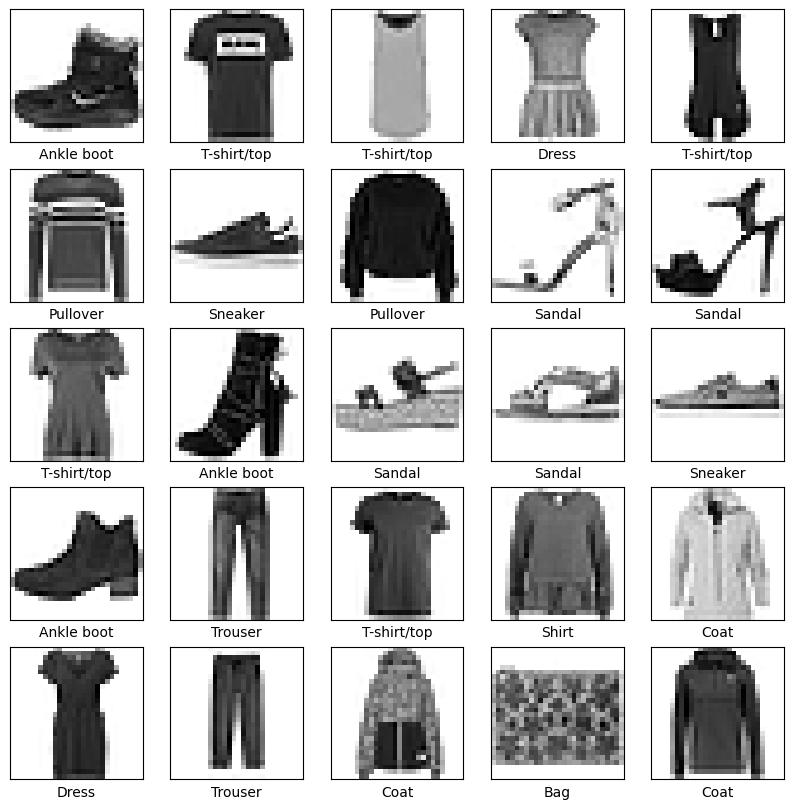

In [ ]:
# Célula 4: Carregar o conjunto de dados
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Mapeamento de labels para os nomes das classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Verificar o formato do conjunto de dados
print(f"Formato do conjunto de treino: {train_images.shape}, labels: {train_labels.shape}")
print(f"Formato do conjunto de teste: {test_images.shape}, labels: {test_labels.shape}")

# Mostrar as primeiras 25 imagens do conjunto de treino
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()



#Introdução à construção do modelo
Vamos agora criar a nossa rede neuronal convolucional (CNN). Uma CNN é composta por uma série de camadas de convolução e "pooling", seguidas por camadas densas que realizam a classificação final. Vamos usar a API funcional do Keras para construir o nosso modelo.

In [ ]:
#Construção do modelo

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

# Normalizar os dados
train_images = train_images / 255.0
test_images = test_images / 255.0

# Remodelar as imagens para que elas tenham um único canal de cor
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Configurar a entrada
inputs = Input(shape=(28, 28, 1))

# Primeira camada de convolução e "pooling"
x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Segunda camada de convolução e "pooling"
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Achatamento da saída para alimentar as camadas densas
x = Flatten()(x)

# Camada densa e camada de saída
x = Dense(128, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

# Criar o modelo
model = Model(inputs=inputs, outputs=outputs)

# Mostrar o resumo do modelo
model.summary()



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0   

#Compilação do modelo

Antes de treinarmos o modelo, precisamos de o compilar. Durante a compilação, definimos o otimizador que ajustará os pesos da rede durante o treino, a função de perda que será minimizada pelo otimizador, e as métricas que gostaríamos de rastrear durante o treino.


In [ ]:
#Compilação do modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


#Treino do modelo

Vamos agora treinar o modelo. Durante o treino, o modelo irá iterar várias vezes (épocas) sobre o conjunto de treino e ajustar os pesos da rede para minimizar a função de perda. Depois de cada época, vamos validar o desempenho do modelo no conjunto de teste.


In [ ]:
#Treino do modelo
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 23s 5ms/step - loss: 0.4439 - accuracy: 0.8382 - val_loss: 0.3611 - val_accuracy: 0.8679
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2987 - accuracy: 0.8905 - val_loss: 0.2904 - val_accuracy: 0.8929
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2531 - accuracy: 0.9064 - val_loss: 0.2768 - val_accuracy: 0.8954
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2230 - accuracy: 0.9168 - val_loss: 0.2753 - val_accuracy: 0.8971
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1959 - accuracy: 0.9265 - val_loss: 0.2564 - val_accuracy: 0.9048
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1740 - accuracy: 0.9343 - val_loss: 0.2604 - val_accuracy: 0.9061
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1537 - accuracy: 0.9416 - val_loss: 0.2470 - val_accuracy

#Visualização do desempenho do modelo

Vamos agora visualizar o desempenho do nosso modelo ao longo do tempo durante o treino. Vamos criar gráficos para a precisão e a perda, tanto para o conjunto de treino como para o conjunto de teste.


Text(0.5, 1.0, 'Loss evolution')

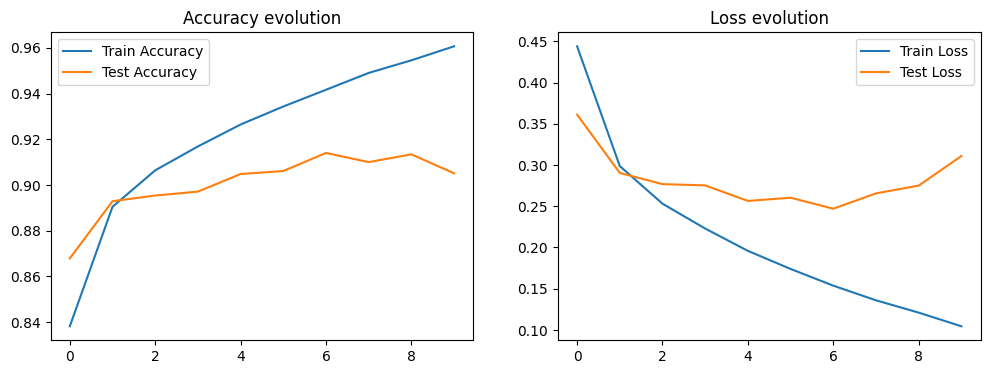

In [ ]:
#Visualização do desempenho do modelo
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title('Accuracy evolution')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Loss evolution')
